In [ ]:
import sys
import os
# Add parent directory to path for imports
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath("__file__"))))

from eeg_analysis_package import *

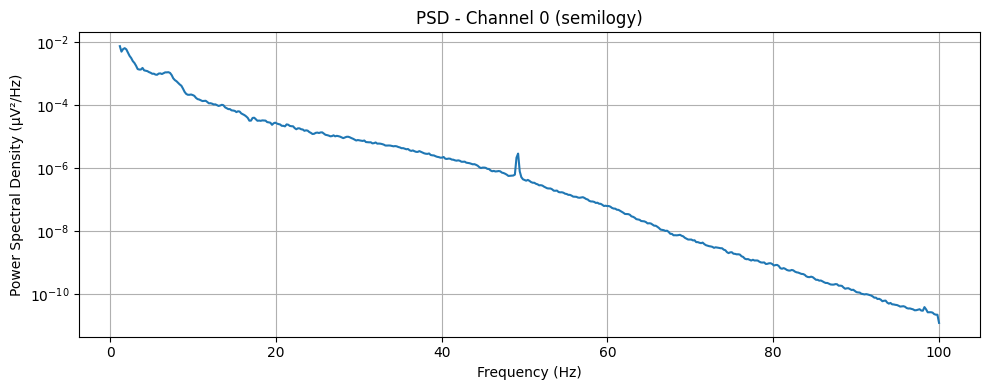

In [4]:
# Example usage
data = load_data()
result = analyze_eeg_channel(data[0], channel_index=0)

# Understand Electrodes Placement

In [ ]:
import h5py

placement_file = '../electrodes_placement.mat'

records = []
skipped = []

with h5py.File(placement_file, 'r') as f:
    eeg_channels = f['eeg_channels']
    n_fields, n_sessions = eeg_channels.shape
    
    for session in range(n_sessions):
        # Extract
        rat_id = ascii_to_str(f[eeg_channels[0, session]][()])
        session_date = ascii_to_str(f[eeg_channels[1, session]][()])
        mapping_vector = f[eeg_channels[2, session]][()].flatten()
        labels = []
        arr = f[eeg_channels[3, session]]
        for i in range(arr.shape[0]):
            label = ascii_to_str(f[arr[i, 0]][()])
            labels.append(label)
        
        if len(mapping_vector) != 32:
            skipped.append({'rat_id': rat_id, 'session_date': session_date, 'mapping_len': len(mapping_vector)})
            continue
        
        records.append({
            'rat_id': rat_id,
            'session_date': session_date,
            'mapping_vector': mapping_vector.copy(),
            'anatomical_labels': labels.copy()
        })

# Convert to DataFrame
df_mapping = pd.DataFrame(records)
df_skipped = pd.DataFrame(skipped)

print("Mapping table (first 3 rows):")
print(df_mapping.head(3))
print("\nSkipped sessions:")
print(df_skipped)

In [15]:
df_mapping[(df_mapping['rat_id'] == '9151') & (df_mapping['session_date'] == '140219')]

,rat_id,session_date,mapping_vector,anatomical_labels
0,9151,140219,"[10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17....",[Mot]


In [16]:
# Convert list columns to comma-separated strings for Excel
df_mapping['mapping_vector_str'] = df_mapping['mapping_vector'].apply(lambda x: ','.join([str(int(v)) for v in x]))
df_mapping['anatomical_labels_str'] = df_mapping['anatomical_labels'].apply(lambda x: ','.join(x))

# Save to Excel
excel_filename = 'electrode_placements.xlsx'
df_mapping.drop(['mapping_vector', 'anatomical_labels'], axis=1).to_excel(excel_filename, index=False)

print(f"Saved mapping table to {excel_filename}")

# Save the skipped list too if you want
df_skipped.to_excel('skipped_sessions.xlsx', index=False)

ModuleNotFoundError: No module named 'openpyxl'